In [1]:
from pprint import pprint 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, UTC

In [2]:
import praw
user_agent = 'Scraper 1.0 by /u/Scraper_prof'

reddit = praw.Reddit(
    client_id = "F5L8zUhZ6dh9RUHmCMuR2w",
    client_secret = "tArpKl8c9dI1YpGnTR5ga2f_xTI9Xw",
    user_agent = user_agent)

Version 7.7.1 of praw is outdated. Version 7.8.1 was released Friday October 25, 2024.


In [3]:
# Scraping data from subreddit 'ArtificialIntelligence'

post_data = []


for submission in reddit.subreddit('ArtificialInteligence').top(time_filter='all', limit=10000):
    title = submission.title
    year = int(datetime.fromtimestamp(submission.created_utc, UTC).strftime('%Y'))
    num_comments = submission.num_comments
    score = submission.score
    upvote_ratio = submission.upvote_ratio

    post_data.append({
        "Title": title, 
        "Year": year,
        "Num_comments": num_comments,
        "Score": score,
        "upvote_ratio": upvote_ratio
    })
        
df = pd.DataFrame(post_data)

print(df.head)

<bound method NDFrame.head of                                                  Title  Year  Num_comments  \
0    There will not be UBI, the earth will just be ...  2024           109   
1                            DeepSeek overtakes OpenAI  2025           248   
2    Former Google CEO Eric Schmidt’s Stanford Talk...  2024           299   
3    Getting Emotional with LLMs Can increase Perfo...  2023            33   
4                                        We are doomed  2025           526   
..                                                 ...   ...           ...   
994  “Electric cars do more harm than good to our c...  2022            20   
995  The Turing Test is obsolete. It’s time to buil...  2021             7   
996    Go master quits because AI "cannot be defeated"  2019             1   
997  Elon Musk warns that ‘advanced AI’ will soon m...  2019             4   
998  Just Got My Artificial Intelligence Essentials...  2024            19   

     Score  upvote_ratio  
0     

In [4]:
df['Year'].unique()


array([2024, 2025, 2023, 2021, 2022, 2020, 2019, 2018], dtype=int64)

In [5]:
df.to_csv('reddit.csv', header=False, encoding='utf-8', index=False)

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\miras\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
# Defining sentiment for Titles in the posts

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in df['Title']:
    pol_score = sia.polarity_scores(line)
    pol_score['Title'] = line
    results.append(pol_score)

pprint(results[-3:-1], width = 100)

[{'Title': 'Go master quits because AI "cannot be defeated"',
  'compound': 0.3724,
  'neg': 0.0,
  'neu': 0.733,
  'pos': 0.267},
 {'Title': 'Elon Musk warns that ‘advanced AI’ will soon manipulate social media platforms',
  'compound': -0.1027,
  'neg': 0.113,
  'neu': 0.887,
  'pos': 0.0}]


In [8]:
df1 = pd.DataFrame(results)
df1.head()

,neg,neu,pos,compound,Title
0,0.000,1.000,0.000,0.0000,"There will not be UBI, the earth will just be ..."
1,0.000,1.000,0.000,0.0000,DeepSeek overtakes OpenAI
2,0.150,0.850,0.000,-0.3182,Former Google CEO Eric Schmidt’s Stanford Talk...
3,0.000,0.698,0.302,0.4404,Getting Emotional with LLMs Can increase Perfo...
4,0.677,0.323,0.000,-0.6369,We are doomed


In [9]:
# Assigning positive, neutral and negaive labels

df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1         # positive label
df1.loc[df1['compound'] < -0.2, 'label'] = -1       #negative label
df1.head()

,neg,neu,pos,compound,Title,label
0,0.000,1.000,0.000,0.0000,"There will not be UBI, the earth will just be ...",0
1,0.000,1.000,0.000,0.0000,DeepSeek overtakes OpenAI,0
2,0.150,0.850,0.000,-0.3182,Former Google CEO Eric Schmidt’s Stanford Talk...,-1
3,0.000,0.698,0.302,0.4404,Getting Emotional with LLMs Can increase Perfo...,1
4,0.677,0.323,0.000,-0.6369,We are doomed,-1


In [10]:
df['Sentiment'] = df1['label']
df.head()

,Title,Year,Num_comments,Score,upvote_ratio,Sentiment
0,"There will not be UBI, the earth will just be ...",2024,109,1988,0.91,0
1,DeepSeek overtakes OpenAI,2025,248,1952,0.96,0
2,Former Google CEO Eric Schmidt’s Stanford Talk...,2024,299,1554,0.99,-1
3,Getting Emotional with LLMs Can increase Perfo...,2023,33,1397,1.00,1
4,We are doomed,2025,526,1378,0.90,-1


In [11]:
df.to_csv('reddit_sentiments.csv', encoding = 'utf-8', index = False)


In [12]:
df['Sentiment'].value_counts()

Sentiment
 0    490
 1    289
-1    220
Name: count, dtype: int64

In [13]:
df['Sentiment'].value_counts(normalize = True) * 100

Sentiment
 0    49.049049
 1    28.928929
-1    22.022022
Name: proportion, dtype: float64

In [14]:
# Examples of Titles with assigned sentiments

print('Positive Titles of the Posts:\n')
pprint(list(df[df['Sentiment']==1]['Title'][:5]), width=200)

print('\nNegative Titles of the Posts:\n')
pprint(list(df[df['Sentiment']==-1]['Title'][:5]), width=200)

Positive Titles of the Posts:

['Getting Emotional with LLMs Can increase Performance by 115% (Case Study)',
 'ChatGPT is actually better than a professional therapist',
 'I created a website that live tracks executive actions by POTUS and summarizes them using AI.',
 '5 Best ChatGPT Prompts that will turn your ChatGPT experience from mundane to mind-blowing',
 "In 3 months I've created 3 comics and 3 mangas with Midjourney."]

Negative Titles of the Posts:

['Former Google CEO Eric Schmidt’s Stanford Talk Gets Awkwardly Live-Streamed: Here’s the Juicy Takeaways',
 'We are doomed',
 'ChatGPT Brings Down Online Education Stocks. Chegg Loses 95%. Students Don’t Need It Anymore',
 "The problem isn't that AI will take our jobs; the problem is that we've built a society that needs jobs to be taken.",
 'The overuse of AI is ruining everything']


## 1. Sentiment Distribution:


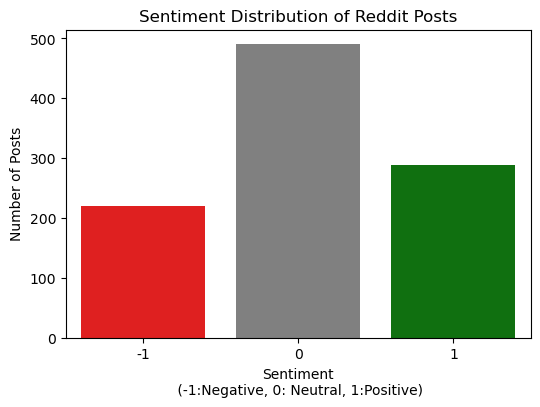

In [15]:
# Column chart to see the number of positive, neutral, and negative posts

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', hue='Sentiment', data=df, palette=['red', 'gray', 'green'], legend=False)
plt.title('Sentiment Distribution of Reddit Posts')
plt.xlabel("Sentiment\n (-1:Negative, 0: Neutral, 1:Positive)")
plt.ylabel('Number of Posts')
plt.show()

## 2. Sentiment Trends Over Time:

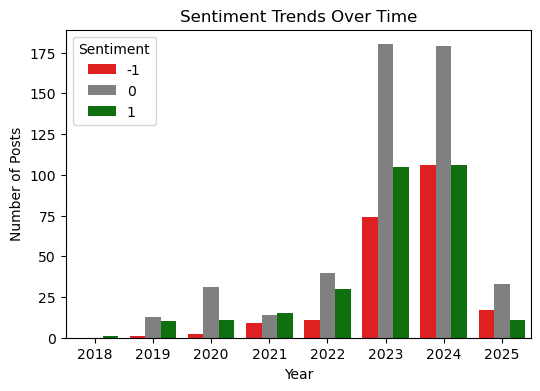

In [16]:
# Column chart showing how positive vs. negative sentiment evolved across years.

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Year', hue='Sentiment', palette=['red', 'gray', 'green'])
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.show()

Sentiment   -1    0    1
Year                    
2018         0    0    1
2019         1   13   10
2020         2   31   11
2021         9   14   15
2022        11   40   30
2023        74  180  105
2024       106  179  106
2025        17   33   11


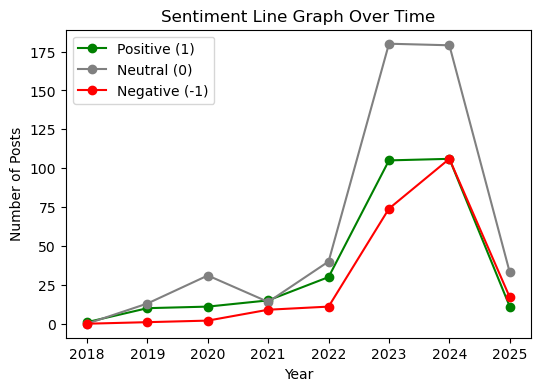

In [17]:
# Line Graph showing how positive vs. negative sentiment evolved across years.

df_grouped = df.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)
print(df_grouped)

plt.figure(figsize=(6,4))
plt.plot(df_grouped.index, df_grouped[1], marker='o', linestyle='-', color='green', label='Positive (1)')
plt.plot(df_grouped.index, df_grouped[0], marker='o', linestyle='-', color='gray', label ='Neutral (0)')
plt.plot(df_grouped.index, df_grouped[-1], marker='o', linestyle='-', color='red', label ='Negative (-1)')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.title('Sentiment Line Graph Over Time')
plt.legend()

plt.show()

## 3. Post Popularity by Sentiment

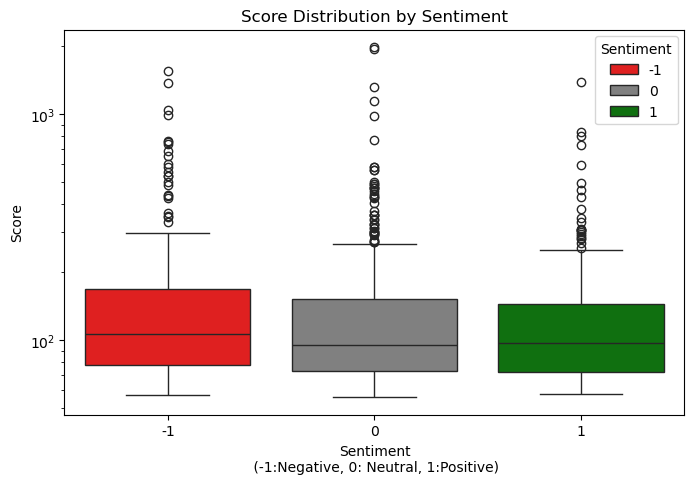

In [23]:
#Score Distribution by Sentiment

plt.figure(figsize=(8,5))

sns.boxplot(data = df, x = 'Sentiment', y = 'Score', hue = 'Sentiment', palette = ['red', 'gray', 'green'])
plt.title("Score Distribution by Sentiment")
plt.ylabel('Score')
plt.xlabel("Sentiment\n (-1:Negative, 0: Neutral, 1:Positive)") 
plt.yscale('log')  # Log scale for better visualization
plt.show()

## 4. Upvote Ratio vs. Sentiment:

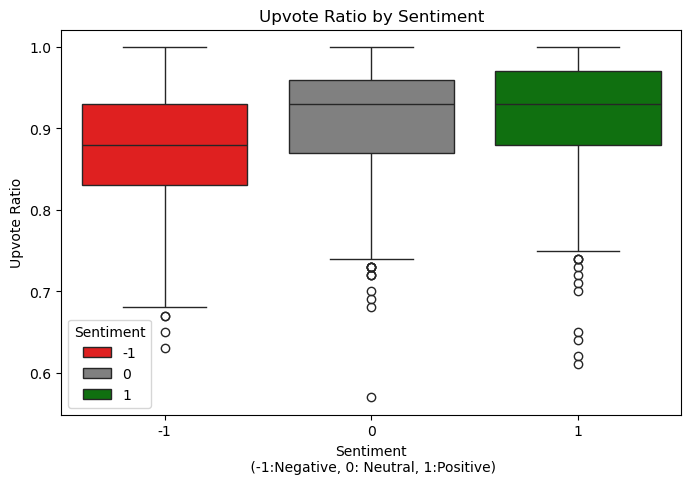

In [24]:
#Upvote Ratio Distribution by Sentiment

plt.figure(figsize=(8,5))

sns.boxplot(data=df, x='Sentiment', y= 'upvote_ratio', hue = 'Sentiment', palette = ['red', 'gray', 'green'])
plt.title('Upvote Ratio by Sentiment')
plt.xlabel("Sentiment\n (-1:Negative, 0: Neutral, 1:Positive)")
plt.ylabel('Upvote Ratio')
plt.show()

## 5. Number of Comments vs Sentiment

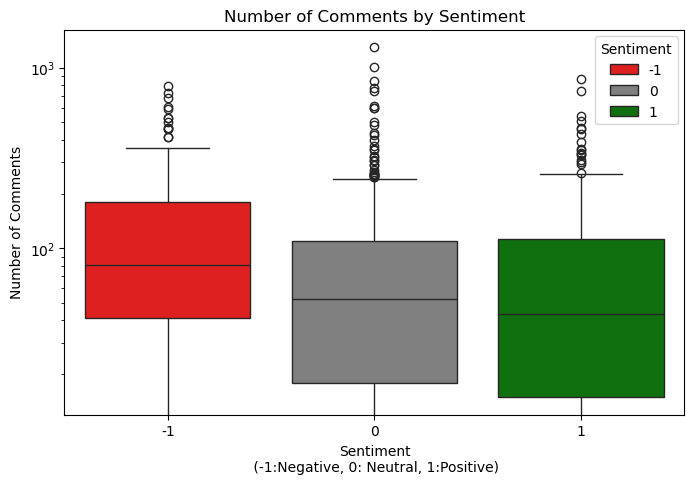

In [25]:
#Number of Comments Distribution by Sentiment

plt.figure(figsize=(8,5))

sns.boxplot(data=df, x='Sentiment', y= 'Num_comments', hue = 'Sentiment', palette = ['red', 'gray', 'green'])
plt.title('Number of Comments by Sentiment')
plt.xlabel("Sentiment\n (-1:Negative, 0: Neutral, 1:Positive)")
plt.ylabel('Number of Comments')
plt.yscale('log')  # Log scale for better visualization
plt.show()

In [26]:
df.head()

,Title,Year,Num_comments,Score,upvote_ratio,Sentiment
0,"There will not be UBI, the earth will just be ...",2024,109,1988,0.91,0
1,DeepSeek overtakes OpenAI,2025,248,1952,0.96,0
2,Former Google CEO Eric Schmidt’s Stanford Talk...,2024,299,1554,0.99,-1
3,Getting Emotional with LLMs Can increase Perfo...,2023,33,1397,1.00,1
4,We are doomed,2025,526,1378,0.90,-1
